In [3]:
import pandas as pd
from sklearn.cluster import KMeans

In [5]:
data = pd.read_csv('task2data.csv', index_col=0)

In [9]:
data.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
CustomerID,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [11]:
data_1 = data[['Annual Income (k$)', 'Spending Score (1-100)']]

In [13]:
data_1

,Annual Income (k$),Spending Score (1-100)
CustomerID,,
1,15,39
2,15,81
3,16,6
4,16,77
5,17,40
...,...,...
196,120,79
197,126,28
198,126,74


In [15]:
data_1.isna().sum()

Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [27]:
from sklearn.preprocessing import StandardScaler

In [29]:
norm = StandardScaler()
norm_data = norm.fit_transform(data_1)

In [31]:
inertia = []
K = range(1, 10)

In [33]:
import matplotlib.pyplot as plt

In [35]:
for k in K:
    kmeans_clustering = KMeans(n_clusters=k).fit(norm_data)
    kmeans_clustering.fit(norm_data)
    inertia.append(kmeans_clustering.inertia_)

C:\Users\noran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\noran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\noran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\noran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

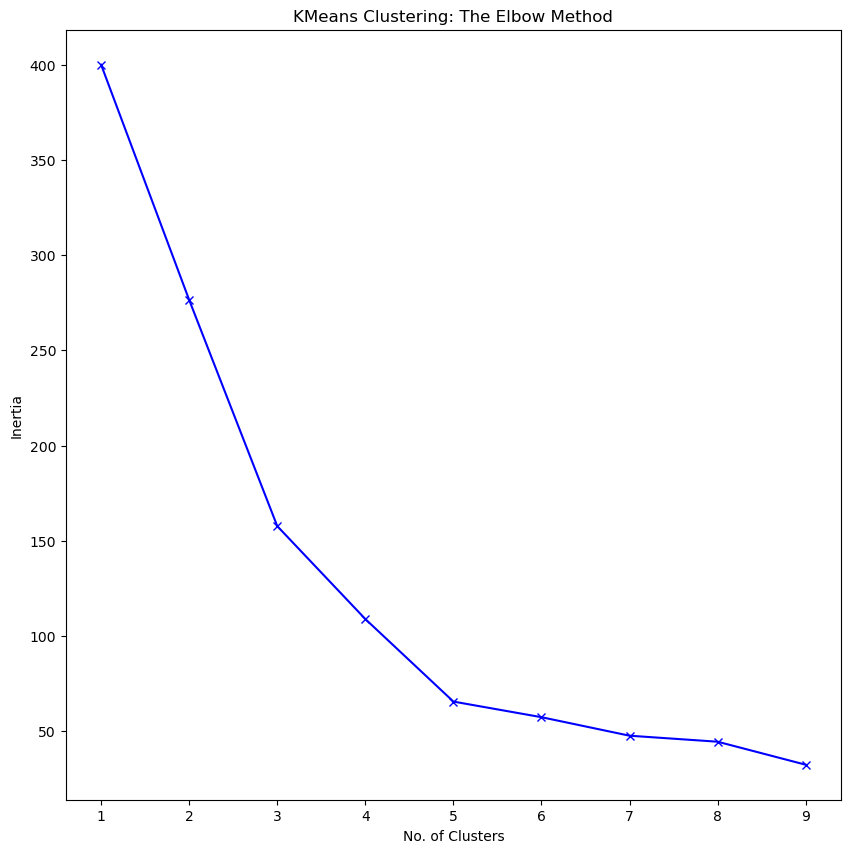

In [39]:
plt.figure(figsize=(10, 10))
plt.plot(K, inertia, 'bx-')
plt.xlabel('No. of Clusters')
plt.ylabel('Inertia')
plt.title('KMeans Clustering: The Elbow Method')
plt.show()

In [51]:
kmeans_clustering = KMeans(n_clusters=5)
data['Clusters'] = kmeans_clustering.fit(norm_data).predict(norm_data)

C:\Users\noran\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [53]:
from sklearn.metrics import silhouette_score

In [55]:
silhouette = silhouette_score(norm_data, data['Clusters'])
print(f'The silhouette score is: {silhouette}')

The silhouette score is: 0.5539423799434205


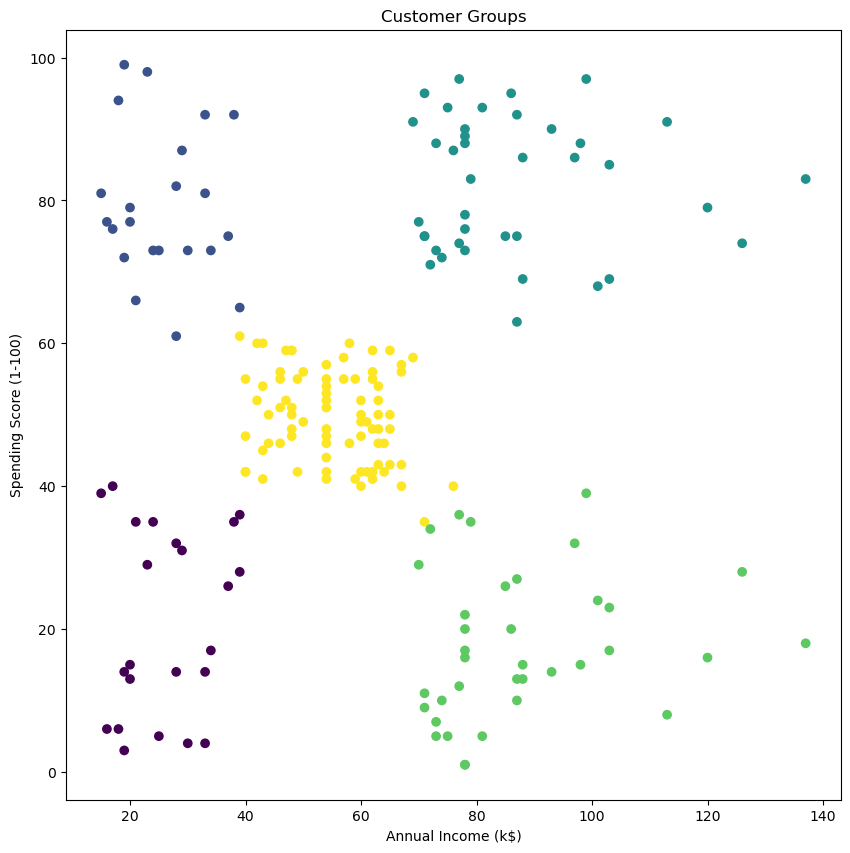

In [61]:
plt.figure(figsize=(10, 10))
plt.scatter(data['Annual Income (k$)'], data['Spending Score (1-100)'], c=data['Clusters'], cmap='viridis')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.title('Customer Groups')
plt.show()